**Objetivo:** Detectar casos de neumonía a partir de imágenes de rayos X utilizando una Red Neuronal Convolucional (CNN)

In [ ]:
# importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cv2
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import os

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:
# Operando con el DataSet
labels = ['PNEUMONIA', 'NORMAL']
img_resize = 150

def get_data(dir):
  data = []
  for label in labels:
    path = os.path.join(dir, label)
    class_num = labels.index(label)

    for img in os.listdir(path):
      try:
        if img.endswith('jpeg'):
          img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
          resized_arr = cv2.resize(img_arr, (img_resize, img_resize))
          data.append([resized_arr, class_num])
      except Exception as e:
        print(e)
  return np.array(data, dtype = 'object')




In [ ]:
train = get_data('/content/drive/MyDrive/IA_Neumonia/chest_xray/train')
test = get_data('/content/drive/MyDrive/IA_Neumonia/chest_xray/test')
val = get_data('/content/drive/MyDrive/IA_Neumonia/chest_xray/val')

Text(0.5, 1.0, 'NORMAL')

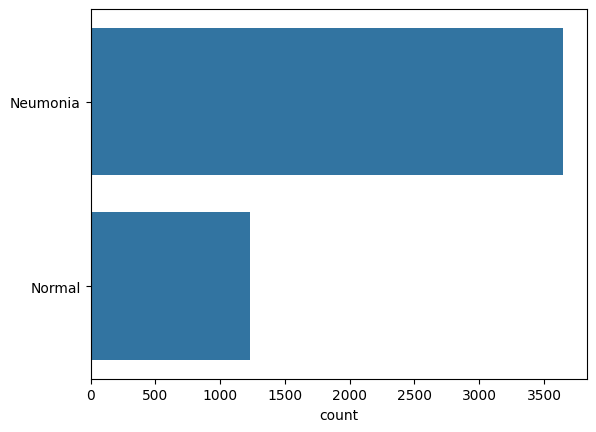

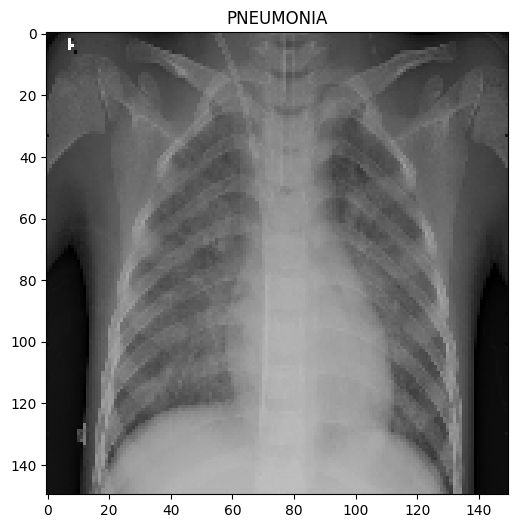

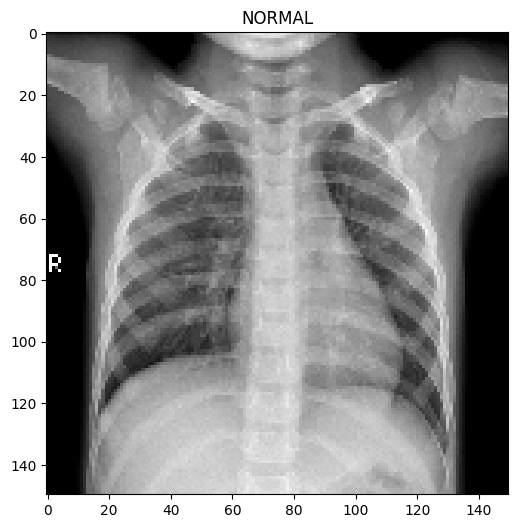

In [ ]:
# Visualización de datos y Preprocesamiento
l = []
for i in train:
  if (i[1] == 0):
    l.append('Neumonia')
  else:
    l.append('Normal')

sns.countplot(l)

plt.figure(figsize=(6,6))

plt.imshow(train[21][0], cmap='gray')
plt.title(labels[train[21][1]])

plt.figure(figsize=(6,6))

plt.imshow(train[-11][0], cmap='gray')
plt.title(labels[train[-11][1]])

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feat, label in train:
  x_train.append(feat)
  y_train.append(label)

for feat, label in val:
  x_val.append(feat)
  y_val.append(label)

for feat, label in test:
  x_test.append(feat)
  y_test.append(label)

# Normalización de datos
x_train = np.array(x_train)/255
x_val = np.array(x_val)/255
x_test = np.array(x_test)/255

# Redimensión de imágenes para la red neuronal
x_train = x_train.reshape(-1, img_resize, img_resize, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_resize, img_resize, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_resize, img_resize, 1)
y_test = np.array(y_test)

datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 30,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = False,
)

datagen.fit(x_train)

In [ ]:
# Creación y Entrenamiento del modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), strides= 1, padding= 'same', activation= 'relu', input_shape= (150, 150, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides= 2, padding= 'same'))
model.add(Conv2D(64, (3, 3), strides= 1, padding= 'same', activation= 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides= 2, padding= 'same'))
model.add(Conv2D(64, (3, 3), strides= 1, padding= 'same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides= 2, padding= 'same'))
model.add(Conv2D(128, (3, 3), strides= 1, padding= 'same', activation= 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides= 2, padding= 'same'))
model.add(Conv2D(256, (3, 3), strides= 1, padding= 'same', activation= 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides= 2, padding= 'same'))
model.add(Flatten())
model.add(Dense(units=128, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation= 'sigmoid'))
model.compile(optimizer= 'rmsprop', loss= 'binary_crossentropy', metrics= ['accuracy'])
model.summary()

learning_rate_reduction = ReduceLROnPlateau(monitor= 'val_accuracy', patiance= 2, verbose= 1, factor= 0.3, min_lr= 0.000001)

history = model.fit(x_train, y_train, batch_size= 32, epochs= 12, validation_data= datagen.flow(x_val, y_val), callbacks= [learning_rate_reduction])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 38, 38, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 38, 38, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 19, 19, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 19, 19, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,246,401 (4.75 MB)

 Trainable params: 1,245,313 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

Epoch 1/12
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8237 - loss: 1.0302

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


153/153 ━━━━━━━━━━━━━━━━━━━━ 423s 3s/step - accuracy: 0.8242 - loss: 1.0261 - val_accuracy: 0.6298 - val_loss: 15.7148 - learning_rate: 0.0010
Epoch 2/12
153/153 ━━━━━━━━━━━━━━━━━━━━ 432s 3s/step - accuracy: 0.9568 - loss: 0.1216 - val_accuracy: 0.6298 - val_loss: 26.5793 - learning_rate: 0.0010
Epoch 3/12
153/153 ━━━━━━━━━━━━━━━━━━━━ 396s 3s/step - accuracy: 0.9646 - loss: 0.1020 - val_accuracy: 0.6298 - val_loss: 18.2747 - learning_rate: 0.0010
Epoch 4/12
153/153 ━━━━━━━━━━━━━━━━━━━━ 404s 3s/step - accuracy: 0.9745 - loss: 0.0913 - val_accuracy: 0.6331 - val_loss: 12.1676 - learning_rate: 0.0010
Epoch 5/12
153/153 ━━━━━━━━━━━━━━━━━━━━ 445s 3s/step - accuracy: 0.9831 - loss: 0.0545 - val_accuracy: 0.7405 - val_loss: 4.3801 - learning_rate: 0.0010
Epoch 6/12
153/153 ━━━━━━━━━━━━━━━━━━━━ 424s 3s/step - accuracy: 0.9829 - loss: 0.0670 - val_accuracy: 0.6298 - val_loss: 24.5578 - learning_rate: 0.0010
Epoch 7/12
153/153 ━━━━━━━━━━━━━━━━━━━━ 452s 3s/step - accuracy: 0.9856 - loss: 0.0502 -

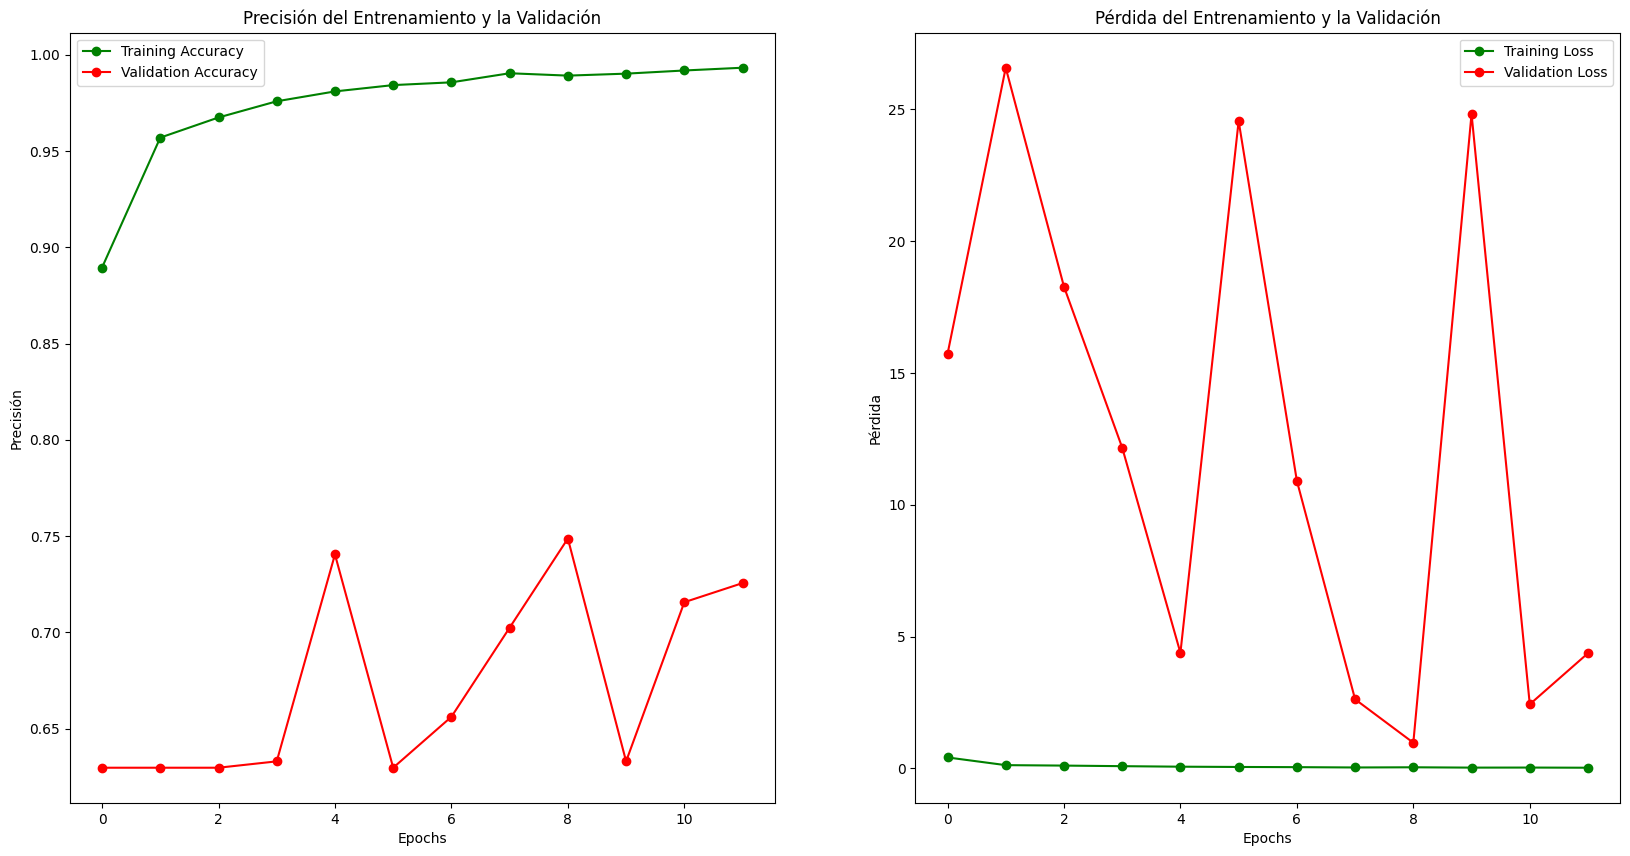

In [ ]:
# Análisis del modelo
epochs = [i for i in range(12)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.set_size_inches(20, 10)
ax[0].plot(epochs, train_acc, 'go-', label= 'Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label= 'Validation Accuracy')
ax[0].set_title('Precisión del Entrenamiento y la Validación')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Precisión')

ax[1].plot(epochs, train_loss, 'g-o', label= 'Training Loss')
ax[1].plot(epochs, val_loss, 'r-o', label= 'Validation Loss')
ax[1].set_title('Pérdida del Entrenamiento y la Validación')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Pérdida')

plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 527ms/step
                    precision    recall  f1-score   support

Neumonía (Clase 0)       0.71      1.00      0.83       245
  Normal (Clase 1)       1.00      0.20      0.34       127

          accuracy                           0.73       372
         macro avg       0.85      0.60      0.58       372
      weighted avg       0.81      0.73      0.66       372



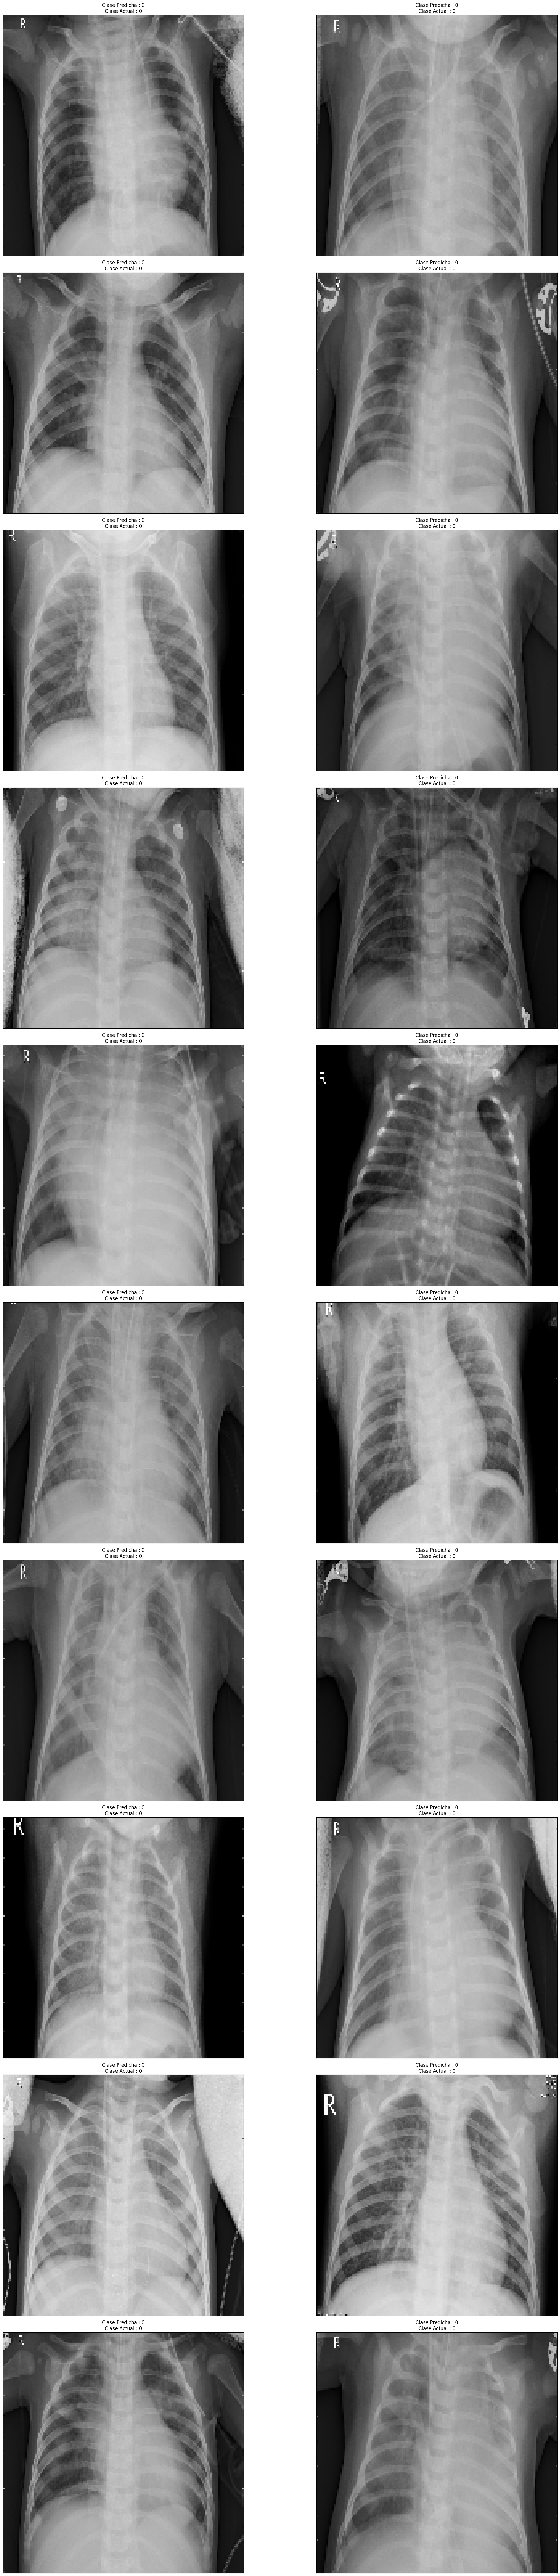

In [ ]:
predictions = (model.predict(x_test) > 0.5).astype('int32')
predictions = predictions.reshape(1, -1)[0]
predictions[:15]

print(classification_report(y_test, predictions, target_names=['Neumonía (Clase 0)', 'Normal (Clase 1)']))

cm = confusion_matrix(y_test, predictions)
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

# Algunas clases predichas correctamente
i = 0
plt.figure(figsize=(30, 90))
for c in correct[:20]:
  plt.subplot(10, 2, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[c].reshape(150, 150), cmap = 'gray', interpolation = 'none')
  plt.title(f'Clase Predicha : {predictions[c]}\nClase Actual : {y_test[c]}')
  plt.tight_layout()
  i += 1